<a href="https://www.kaggle.com/code/badr2211/segmentation?scriptVersionId=145914150" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier  
import keras

- Load Data

In [3]:
path='/kaggle/input/bank-marketing/bank-additional-full.csv'
data = pd.read_csv(path, sep = ";")

***
- data preprocessing

In [4]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:

def uniq(df):
    df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
    return df

uniq_df=uniq(data)
uniq_df

,val,types,len
feature,,,
age,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...",int64,78
job,"[housemaid, services, admin., blue-collar, tec...",object,12
marital,"[married, single, divorced, unknown]",object,4
education,"[basic.4y, high.school, basic.6y, basic.9y, pr...",object,8
default,"[no, unknown, yes]",object,3
housing,"[no, yes, unknown]",object,3
loan,"[no, yes, unknown]",object,3
contact,"[telephone, cellular]",object,2
month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ...",object,10


- all feaature with $2$ or $3$  is ```numeric```(binary) feature 
- note : it has a object type

In [7]:
binary_inf=uniq_df[uniq_df['len']<=3]
binary_inf

,val,types,len
feature,,,
default,"[no, unknown, yes]",object,3
housing,"[no, yes, unknown]",object,3
loan,"[no, yes, unknown]",object,3
contact,"[telephone, cellular]",object,2
poutcome,"[nonexistent, failure, success]",object,3
y,"[no, yes]",object,2


In [8]:
#we can use .map or .replace we can't use  pd.to_numeric because value not num assign as obj
data['y'] = data['y'].replace({'no':0,'yes':1}) 

#by defult the other value will assign to NAN
data['loan'] = data['loan'].map({'no':0,'yes':1})
data['housing'] = data['housing'].map({'no':0,'yes':1})
data['default'] = data['default'].map({'no':0,'yes':1})
data['poutcome'] = data['poutcome'].map({'failure':0,'success':1}) 
data['contact'] =data['contact'].map({'telephone':0,'cellular':1})

- Now we can add it to num_df

In [9]:
data.isna().sum()

age                   0
job                   0
marital               0
education             0
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

- ```default``` and ```poutcome```  have more null value so we drop it

In [10]:
data.drop(['default','poutcome'],axis=1,inplace=True)

- we deal with other Null value

In [11]:
data.loc[:,data.columns!='housing']

,age,job,marital,education,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0.0,0,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,0,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,1.0,0,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1,nov,fri,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0.0,1,nov,fri,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0.0,1,nov,fri,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0.0,1,nov,fri,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [12]:
data.dropna(axis=0,inplace=True)

In [13]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
num_df = data.select_dtypes(include=('float','int'))
#num_df =  pd.concat([num_df,data[binary_inf.index]], axis=1)
num_df

,age,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.0,0.0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.0,0.0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1.0,0.0,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.0,0.0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.0,1.0,0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1.0,0.0,1,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,0.0,0.0,1,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,1.0,0.0,1,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,0.0,0.0,1,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [15]:
cat_df= data .select_dtypes(exclude=['int','float'])
cat_df

,job,marital,education,month,day_of_week
0,housemaid,married,basic.4y,may,mon
1,services,married,high.school,may,mon
2,services,married,high.school,may,mon
3,admin.,married,basic.6y,may,mon
4,services,married,high.school,may,mon
...,...,...,...,...,...
41183,retired,married,professional.course,nov,fri
41184,blue-collar,married,professional.course,nov,fri
41185,retired,married,university.degree,nov,fri
41186,technician,married,professional.course,nov,fri


***
# EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
num_df

,age,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.0,0.0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.0,0.0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1.0,0.0,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.0,0.0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.0,1.0,0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1.0,0.0,1,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,0.0,0.0,1,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,1.0,0.0,1,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,0.0,0.0,1,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


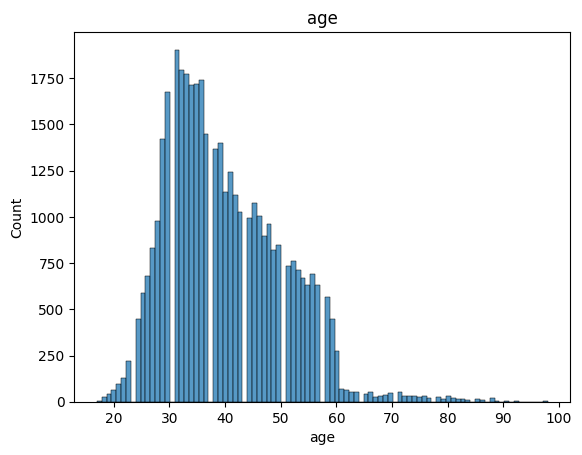

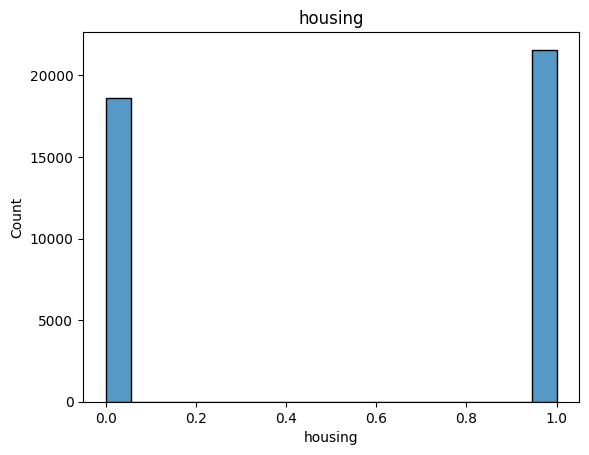

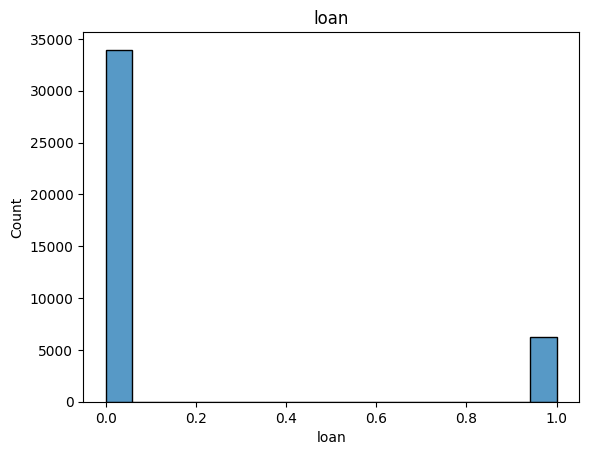

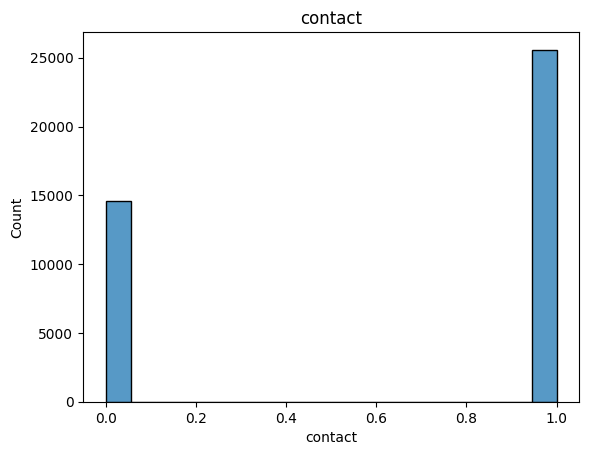

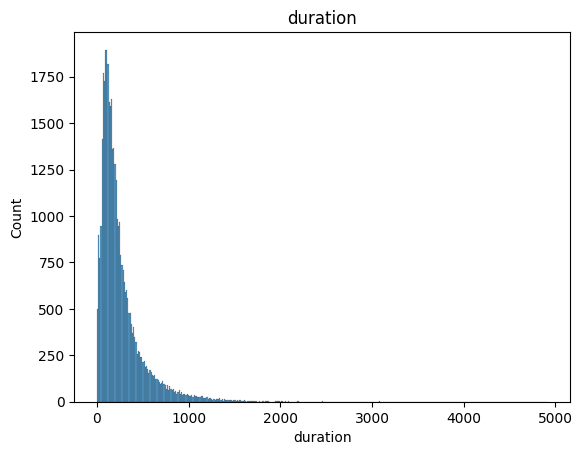

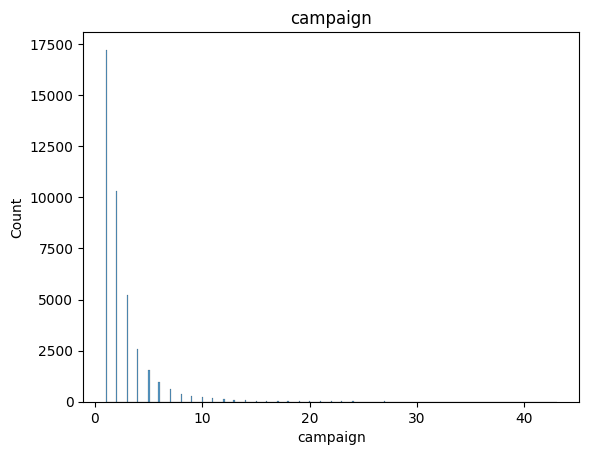

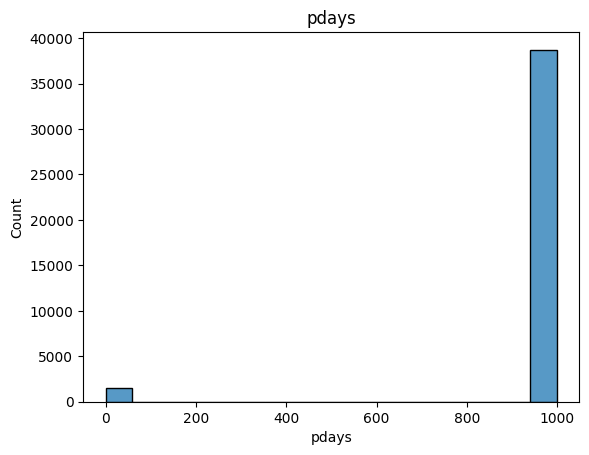

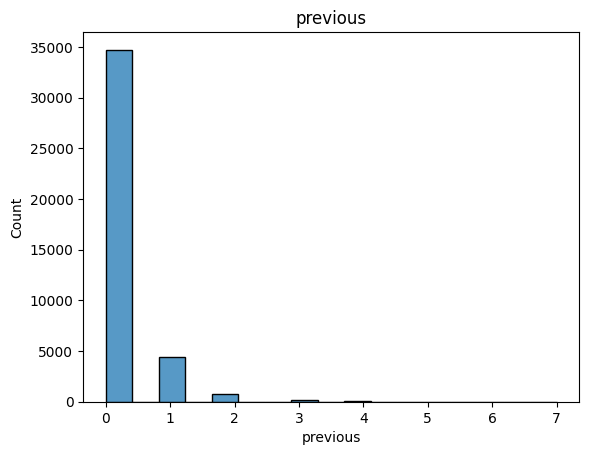

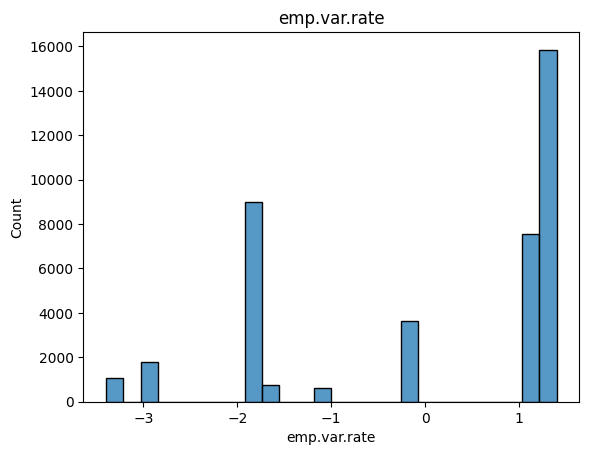

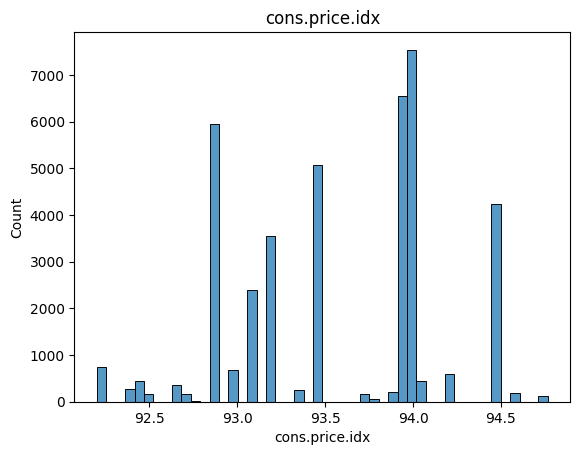

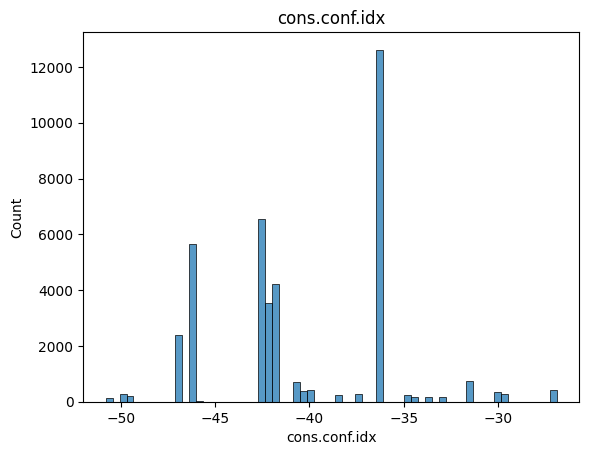

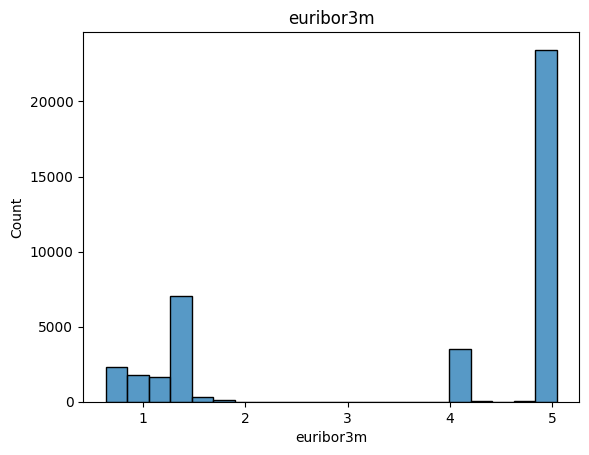

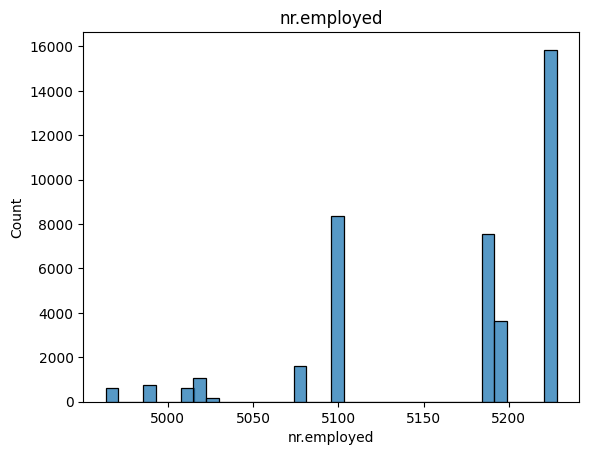

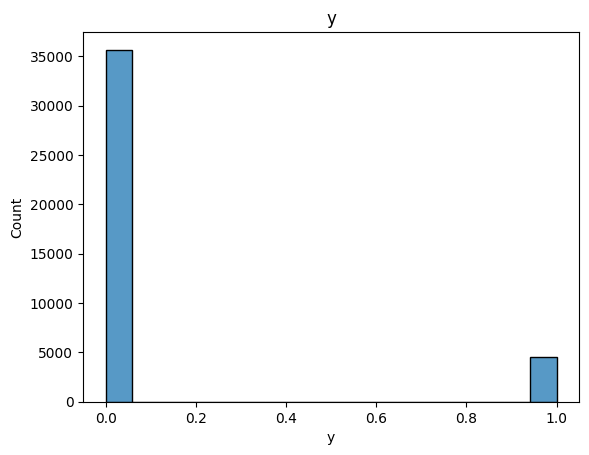

In [18]:
for n in num_df.columns: 
    sns .histplot (x=n,data=data)
    plt.title(n)
    plt.show()


In [19]:
#sns.pairplot()

In [20]:
lb = LabelBinarizer()
for c in cat_df.columns: 
    print(c)
    data[c] = lb .fit_transform(data[c])

job
marital
education
month
day_of_week


In [21]:
data

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,1,0.0,0.0,0,0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0,0,0,0.0,0.0,0,0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0,0,0,1.0,0.0,0,0,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,0,0,0.0,0.0,0,0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0,0,0,0.0,1.0,0,0,0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,0,0,1.0,0.0,1,0,1,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,0,0,0,0.0,0.0,1,0,1,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,0,0,0,1.0,0.0,1,0,1,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,0,0,0,0.0,0.0,1,0,1,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [22]:
X = data.drop(columns=['y'])  # Replace 'target_column' with the name of your target column
y = data['y']


In [23]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
data['y'].value_counts()

y
0    35665
1     4533
Name: count, dtype: int64

In [25]:
# Create a simple feedforward neural network model using Keras
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer matching the number of features
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(32,activation='relu'),
    #keras.layers.Dense(64,activation='relu'),
    #keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')     # Output layer with a sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
1005/1005 [==============================] - 3s 3ms/step - loss: 5.7066 - accuracy: 0.8598 - val_loss: 0.5242 - val_accuracy: 0.9011
Epoch 2/20
1005/1005 [==============================] - 2s 2ms/step - loss: 1.1354 - accuracy: 0.8683 - val_loss: 0.3080 - val_accuracy: 0.8898
Epoch 3/20
1005/1005 [==============================] - 2s 2ms/step - loss: 1.1060 - accuracy: 0.8684 - val_loss: 0.6235 - val_accuracy: 0.8935
Epoch 4/20
1005/1005 [==============================] - 2s 2ms/step - loss: 0.8460 - accuracy: 0.8725 - val_loss: 0.3263 - val_accuracy: 0.8927
Epoch 5/20
1005/1005 [==============================] - 3s 3ms/step - loss: 0.8983 - accuracy: 0.8714 - val_loss: 0.6467 - val_accuracy: 0.8974
Epoch 6/20
1005/1005 [==============================] - 2s 2ms/step - loss: 0.8890 - accuracy: 0.8725 - val_loss: 0.3495 - val_accuracy: 0.8831
Epoch 7/20
1005/1005 [==============================] - 3s 2ms/step - loss: 0.6467 - accuracy: 0.8787 - val_loss: 0.6611 - val_accuracy:

In [27]:

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

252/252 [==============================] - 0s 1ms/step - loss: 0.2644 - accuracy: 0.9020
Test Loss: 0.2643648684024811
Test Accuracy: 0.9019900560379028
